# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [83]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [84]:
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass

# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
api_key = getpass()

In [85]:
# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data.append(response.json())
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Now 'data' contains the NEO data for the 1-year period


In [86]:
# Check the date coverage of your data.
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))

['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [87]:
from src.utils import get_a_random_chunk_property

In [88]:
get_a_random_chunk_property(data)

date: 2022-09-10
NEO name: (2022 SP2)
absolute_magnitude_h: 26.67


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

### Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [104]:
import pandas as pd

# Assuming you have already fetched the data and stored it in the 'data' list

# Initialize lists to store the extracted information
date_list = []
neo_name_list = []
neo_size_list = []
is_hazardous_list = []
close_approach_distance_list = []

# Iterate over the fetched data and extract the required information
for week_data in data:
    for date, neo_data in week_data['near_earth_objects'].items():
        for neo in neo_data:
            date_list.append(date)
            neo_name_list.append(neo['name'])
            neo_size_list.append(neo['estimated_diameter']['kilometers']['estimated_diameter_max'])
            is_hazardous_list.append(neo['is_potentially_hazardous_asteroid'])

            close_approach_data = neo['close_approach_data']
            for approach in close_approach_data:
                miss_distance = approach['miss_distance']
                close_approach_distance_list.append(miss_distance['kilometers'])

# Create a DataFrame from the extracted information
df = pd.DataFrame({
    'Date': date_list,
    'NEO Name': neo_name_list,
    'NEO Size (km)': neo_size_list,
    'Is Potentially Hazardous': is_hazardous_list,
    'Close Approach Distance (km)': close_approach_distance_list
})

# Convert 'Close Approach Distance (km)' column to float
df['Close Approach Distance (km)'] = df['Close Approach Distance (km)'].astype(float)

# Format the 'Close Approach Distance (km)' column
df['Close Approach Distance (km)'] = df['Close Approach Distance (km)'].apply(lambda x: f'{x:,.2f}')

# Display the resulting DataFrame
print(df)


            Date             NEO Name  NEO Size (km)  \
0     2022-01-07    216523 (2001 HY7)       0.430566   
1     2022-01-07   494697 (2004 SW55)       0.416908   
2     2022-01-07  496860 (1999 XL136)       0.688716   
3     2022-01-07           (2006 AL4)       0.061665   
4     2022-01-07            (2008 CO)       0.179490   
...          ...                  ...            ...   
7946  2022-12-31            (2023 AW)       0.042271   
7947  2022-12-31           (2023 AC2)       0.077990   
7948  2022-12-31            (2023 BE)       0.078350   
7949  2022-12-31           (2023 BJ2)       0.092478   
7950  2022-12-31           (2023 BH4)       0.154896   

      Is Potentially Hazardous Close Approach Distance (km)  
0                         True                58,057,610.95  
1                         True                20,026,765.13  
2                         True                13,396,081.45  
3                        False                14,239,203.68  
4                

('2023-01-01', [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2154347?api_key=0HlrWeFfZOCR91KZrHqv1vaUfQbd3n25gnyQdBdb'}, 'id': '2154347', 'neo_reference_id': '2154347', 'name': '154347 (2002 XK4)', 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2154347', 'absolute_magnitude_h': 16.07, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.6238839022, 'estimated_diameter_max': 3.6311147929}, 'meters': {'estimated_diameter_min': 1623.883902199, 'estimated_diameter_max': 3631.1147928846}, 'miles': {'estimated_diameter_min': 1.0090343642, 'estimated_diameter_max': 2.25626943}, 'feet': {'estimated_diameter_min': 5327.7032616906, 'estimated_diameter_max': 11913.1066570875}}, 'is_potentially_hazardous_asteroid': False, 'close_approach_data': [{'close_approach_date': '2023-01-01', 'close_approach_date_full': '2023-Jan-01 18:44', 'epoch_date_close_approach': 1672598640000, 'relative_velocity': {'kilometers_per_second': '27.3921991495', 'kilometers_per_hour': '98611

### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

In [77]:
# Write your code

### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

In [67]:
proportions = df['Is Potentially Hazardous'].value_counts(normalize=True)
print("Proportion hazardous:\n", proportions)


Proportion hazardous:
 False    0.936234
True     0.063766
Name: Is Potentially Hazardous, dtype: float64


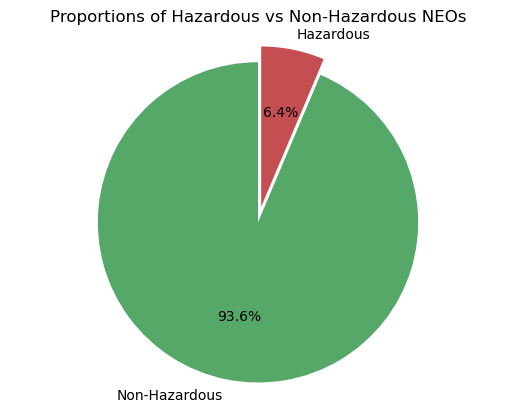

In [78]:
import matplotlib.pyplot as plt

data = df['Is Potentially Hazardous'].value_counts(normalize=True)

labels = ['Non-Hazardous', 'Hazardous']
colors = ['#55a868', '#c44e52']
explode = [0, 0.1]  # Explode the second slice (Hazardous)

fig, ax = plt.subplots()

ax.pie(data, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

ax.set_title('Proportions of Hazardous vs Non-Hazardous NEOs')

plt.show()


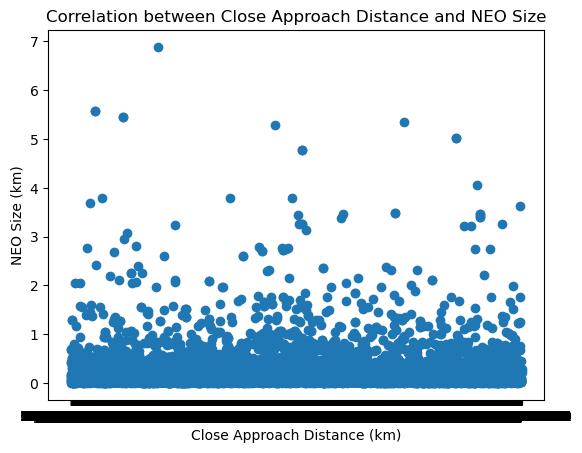

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
neo_sizes = df['NEO Size (km)']
close_distances = df['Close Approach Distance (km)']

# Create the scatter plot
plt.scatter(close_distances, neo_sizes)

# Set axis labels and title
plt.xlabel('Close Approach Distance (km)')
plt.ylabel('NEO Size (km)')
plt.title('Correlation between Close Approach Distance and NEO Size')

# Display the plot
plt.show()


In [77]:
import plotly.graph_objects as go

data = df['Is Potentially Hazardous'].value_counts(normalize=True)

labels = ['Non-Hazardous', 'Hazardous']
colors = ['#55a868', '#c44e52']
explode = [0, 0.1]  # Explode the second slice (Hazardous)

fig = go.Figure(data=[go.Pie(labels=labels, values=data, hole=0.3,
                             marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)),
                             hoverinfo='label+percent', textinfo='percent',
                             textfont=dict(size=14),
                             pull=explode
                             )
                      ])

fig.update_layout(title='Proportions of Hazardous vs Non-Hazardous NEOs', showlegend=True)

fig.show()


In [105]:
import pandas as pd
import plotly.graph_objects as go

# Sample data
neo_sizes = df['NEO Size (km)']
close_distances = df['Close Approach Distance (km)']

# Create the scatter plot with adjusted marker size and transparency
fig = go.Figure(data=go.Scatter(
    x=close_distances,
    y=neo_sizes,
    mode='markers',
    marker=dict(
        size=10,  # Adjust the marker size to make them more visible
        opacity=0.7  # Set marker opacity to make them semi-transparent
    )
))

# Set axis labels and title
fig.update_layout(
    xaxis_title='Close Approach Distance (km)',
    yaxis_title='NEO Size (km)',
    title='Correlation between Close Approach Distance and NEO Size'
)

# Format the close approach distance labels
fig.update_traces(textposition='top center', texttemplate='%{x:.2f}')  # Displaying two decimal places

# Display the plot
fig.show()


### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

In [ ]:
# Write your code

### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.